In [1]:
import numpy as np
import mpmath
from mpmath import *
import matplotlib.pyplot as plt 


d=10
mp.dps = d

x0=0.36
r=4

n_new=412 #número de pontos novos a serem previstos

for i in range(200): #eliminar o transiente
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    
    
lenght=100 #tamanho da série temporal

x_timeser=matrix(lenght+n_new, 1)

for i in range(lenght+n_new):
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    x_timeser[i,0]=x1
    
print(x_timeser)

x_timeser_r=x_timeser.copy() #cópia da série original que nunca será modificada
x_timeser_o=x_timeser.copy() #cópia da série, no final serão adicionados os novos pontos reconstrúidos pelo método

t=np.arange(0,lenght,1)

plt.plot(t,np.asarray(x_timeser.tolist())[:lenght],'b')
plt.title('time series')
plt.show()


[    0.298903659]
[   0.8382410465]
[   0.5423719779]
[    0.992818462]
[  0.02851985419]
[   0.1108258884]
[   0.3941740435]
[   0.9552034678]
[   0.1711592118]
[    0.567454944]
[   0.9817993221]
[  0.07147765281]
[   0.2654743918]
[   0.7799909565]
[   0.6864202572]
[   0.8609899508]
[   0.4787450217]
[   0.9981929036]
[ 0.007215323267]
[  0.02865304951]
[   0.1113282091]
[   0.3957369557]
[   0.9565168704]
[   0.1663693883]
[   0.5547624597]
[    0.988004292]
[  0.04740724377]
[    0.180639188]
[   0.5920346871]
[   0.9661184655]
[   0.1309343046]
[   0.4551620498]
[   0.9919582329]
[  0.03190838838]
[   0.1235609725]
[   0.4331746343]
[    0.982137482]
[  0.07017379377]
[   0.2609977297]
[   0.7715116592]
[   0.7051256756]
[   0.8316938289]
[   0.5599168156]
[   0.9856399008]
[  0.05661554681]
[   0.2136409067]
[   0.6719938787]
[   0.8816724228]
[   0.4173046468]
[   0.9726459143]
[   0.1064233589]
[   0.3803897104]
[   0.9427735145]
[   0.2158064595]
[   0.6769361261]
[   0.8747

In [2]:
def lyapunov(x0,r): #função que calcula lyapunov
    
    for i in range(200): 
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
    
    lyp=0
    for i in range(10000):
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
        aux=mpf(r-mpf(2*mpf(r*x1)))
        #print(aux)
        aux=mpmath.log(abs(aux))
        #print(aux)
        lyp=lyp+aux
        lyp+mpf(lyp)
    lyp=mpf(lyp/100000)
    
    return lyp

In [3]:
def distanc(v1,v2):
    return mpmath.norm(v2-v1,2)
        

[    0.298903659]
[   0.8382410465]
[   0.5423719779]
[    0.992818462]
[  0.02851985419]
[   0.1108258884]
[   0.3941740435]
[   0.9552034678]
[   0.1711592118]
[    0.567454944]
[   0.9817993221]
[  0.07147765281]
[   0.2654743918]
[   0.7799909565]
[   0.6864202572]
[   0.8609899508]
[   0.4787450217]
[   0.9981929036]
[ 0.007215323267]
[  0.02865304951]
[   0.1113282091]
[   0.3957369557]
[   0.9565168704]
[   0.1663693883]
[   0.5547624597]
[    0.988004292]
[  0.04740724377]
[    0.180639188]
[   0.5920346871]
[   0.9661184655]
[   0.1309343046]
[   0.4551620498]
[   0.9919582329]
[  0.03190838838]
[   0.1235609725]
[   0.4331746343]
[    0.982137482]
[  0.07017379377]
[   0.2609977297]
[   0.7715116592]
[   0.7051256756]
[   0.8316938289]
[   0.5599168156]
[   0.9856399008]
[  0.05661554681]
[   0.2136409067]
[   0.6719938787]
[   0.8816724228]
[   0.4173046468]
[   0.9726459143]
[   0.1064233589]
[   0.3803897104]
[   0.9427735145]
[   0.2158064595]
[   0.6769361261]
[   0.8747

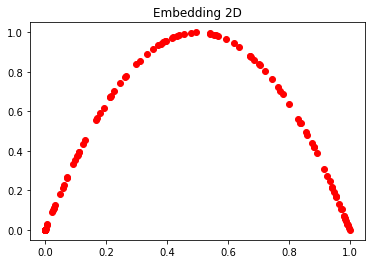

In [4]:
D=2

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    for j in range (D):
        coor_emb[i,j]=x_timeser[i+j,0] #pegando as coordenadas no espaço de dimensão D

print(x_timeser,coor_emb)

plt.plot(coor_emb[:,0],coor_emb[:,1],'ro')
plt.title('Embedding 2D')
plt.show()




0 0.298903659 0.8382410465
1 0.8382410465 0.5423719779
2 0.5423719779 0.992818462
3 0.992818462 0.02851985419
4 0.02851985419 0.1108258884
5 0.1108258884 0.3941740435
6 0.3941740435 0.9552034678
7 0.9552034678 0.1711592118
8 0.1711592118 0.567454944
9 0.567454944 0.9817993221
10 0.9817993221 0.07147765281
11 0.07147765281 0.2654743918
12 0.2654743918 0.7799909565
13 0.7799909565 0.6864202572
14 0.6864202572 0.8609899508
15 0.8609899508 0.4787450217
16 0.4787450217 0.9981929036
17 0.9981929036 0.007215323267
18 0.007215323267 0.02865304951
19 0.02865304951 0.1113282091
20 0.1113282091 0.3957369557
21 0.3957369557 0.9565168704
22 0.9565168704 0.1663693883
23 0.1663693883 0.5547624597
24 0.5547624597 0.988004292
25 0.988004292 0.04740724377
26 0.04740724377 0.180639188
27 0.180639188 0.5920346871
28 0.5920346871 0.9661184655
29 0.9661184655 0.1309343046
30 0.1309343046 0.4551620498
31 0.4551620498 0.9919582329
32 0.9919582329 0.03190838838
33 0.03190838838 0.1235609725
34 0.1235609725 0.4

lyap 0.06931907829 1.049221356
dist 0.002650780715
b -1.540763042 c 0.5934849686
delta 0.003298131751
new value 0.7720305869
new coor 124 0.2858243049 0.7720305869
0.2858243049 0.7720305869
indmin 117 dist0 0.00265078078
lyap 0.06931907829 1.049221356
dist 0.002781255805
b -1.463029578 c 0.5351088702
delta 0.004479270094
new value 0.7337544238
new coor 125 0.7720305869 0.7337544238
0.7720305869 0.7337544238
indmin 118 dist0 0.002781255724
lyap 0.06931907829 1.049221356
dist 0.002918152903
b -1.619862099 c 0.6559848051
delta 0.003741469391
new value 0.8118017841
new coor 126 0.7337544238 0.8118017841
0.7337544238 0.8118017841
indmin 119 dist0 0.002918152404
lyap 0.06931907829 1.049221356
dist 0.003061787823
b -1.289719721 c 0.4158383651
delta 0.004847636776
new value 0.6472836791
new coor 127 0.8118017841 0.6472836791
0.8118017841 0.6472836791
indmin 120 dist0 0.003061787696
lyap 0.06931907829 1.049221356
dist 0.00321249304
b -1.882028287 c 0.8855031733
delta 0.004216733297
new value 0.

lyap 0.06931907829 1.049221356
dist 0.0002455935195
b -1.463029578 c 0.5351138435
delta 0.0004131160391
new value 0.7317213468
new coor 161 0.7705143799 0.7317213468
0.7705143799 0.7317213468
indmin 118 dist0 0.0002455965976
lyap 0.06931907829 1.049221356
dist 0.0002576851953
b -1.619862099 c 0.655988281
delta 0.0003081179887
new value 0.8100851084
new coor 162 0.7317213468 0.8100851084
0.7317213468 0.8100851084
indmin 119 dist0 0.0002576827297
lyap 0.06931907829 1.049221356
dist 0.0002703662231
b -1.289719721 c 0.4158441906
delta 0.000444359019
new value 0.6450820402
new coor 163 0.8100851084 0.6450820402
0.8100851084 0.6450820402
indmin 120 dist0 0.0002703662468
lyap 0.06931907829 1.049221356
dist 0.0002836740402
b -1.882028287 c 0.8855075874
delta 0.0003527718512
new value 0.9411905295
new coor 164 0.6450820402 0.9411905295
0.6450820402 0.9411905295
indmin 121 dist0 0.0002836824426
lyap 0.06931907829 1.049221356
dist 0.0002976456772
b -0.5716486098 c 0.0816954758
delta 0.00047950380

lyap 0.06931907829 1.049221356
dist 0.0002472212108
b -1.622530109 c 0.658150938
delta 0.0004486447274
new value 0.8114893767
new coor 198 0.7324293785 0.8114893767
0.7324293785 0.8114893767
indmin 155 dist0 0.0002472206396
lyap 0.06931907829 1.049221356
dist 0.0002593891748
b -1.293217442 c 0.418102821
delta 0.0002604910377
new value 0.6467389664
new coor 199 0.8114893767 0.6467389664
0.8114893767 0.6467389664
indmin 192 dist0 0.0001056667249
lyap 0.06931907829 1.049221356
dist 0.0001108677845
b -1.885620426 c 0.8888910961
delta 7.610297143e-5
new value 0.9428482644
new coor 200 0.6467389664 0.9428482644
0.6467389664 0.9428482644
indmin 193 dist0 0.0001108483365
lyap 0.06931907829 1.049221356
dist 0.000116304442
b -0.5685999184 c 0.08082645471
delta 0.0002198090001
new value 0.2844098637
new coor 201 0.9428482644 0.2844098637
0.9428482644 0.2844098637
indmin 194 dist0 0.0001163052645
lyap 0.06931907829 1.049221356
dist 0.0001220299673
b -1.541589626 c 0.5941246409
delta 0.000106128141

lyap 0.06931907829 1.049221356
dist 0.0001017194033
b -1.295676538 c 0.4196944141
delta 0.0001857095557
new value 0.6479311238
new coor 235 0.8123164895 0.6479311238
0.8123164895 0.6479311238
indmin 168 dist0 9.105238629e-5
lyap 0.06931907829 1.049221356
dist 9.553410824e-5
b -1.887285479 c 0.8904616142
delta 0.0001480377801
new value 0.9437167583
new coor 236 0.6479311238 0.9437167583
0.6479311238 0.9437167583
indmin 169 dist0 9.551497481e-5
lyap 0.06931907829 1.049221356
dist 0.0001002163514
b -0.570140673 c 0.08126509218
delta 0.0001351259251
new value 0.2851378994
new coor 237 0.9437167583 0.2851378994
0.9437167583 0.2851378994
indmin 170 dist0 0.0001002175152
lyap 0.06931907829 1.049221356
dist 0.0001051503572
b -1.543403188 c 0.5955233434
delta 0.0001612132767
new value 0.7717822005
new coor 238 0.2851378994 0.7717822005
0.2851378994 0.7717822005
indmin 189 dist0 9.742137604e-5
lyap 0.06931907829 1.049221356
dist 0.0001022165883
b -1.466272646 c 0.5374888583
delta 0.00019644765
n

lyap 0.06931907829 1.049221356
dist 0.0001111539167
b -1.888643625 c 0.8917436788
delta 0.0001650490391
new value 0.944404337
new coor 272 0.6484445028 0.944404337
0.6484445028 0.944404337
indmin 229 dist0 0.0001111675042
lyap 0.06931907829 1.049221356
dist 0.0001166393195
b -0.5710230395 c 0.08151682112
delta 0.0001648615773
new value 0.2855939506
new coor 273 0.944404337 0.2855939506
0.944404337 0.2855939506
indmin 230 dist0 0.0001166410388
lyap 0.06931907829 1.049221356
dist 0.0001223822689
b -1.5448393 c 0.5966321072
delta 0.0001808665404
new value 0.7725100831
new coor 274 0.2855939506 0.7725100831
0.2855939506 0.7725100831
indmin 231 dist0 0.0001223642573
lyap 0.06931907829 1.049221356
dist 0.000128387192
b -1.468682951 c 0.5392573947
delta 0.0001822291704
new value 0.7344325903
new coor 275 0.7725100831 0.7344325903
0.7725100831 0.7344325903
indmin 232 dist0 0.0001283746223
lyap 0.06931907829 1.049221356
dist 0.0001346933954
b -1.624632979 c 0.6598580693
delta 0.0001983642578
ne

lyap 0.06931907829 1.049221356
dist 9.717825562e-5
b -0.5704980521 c 0.08136700138
delta 0.0001479271528
new value 0.2853229896
new coor 309 0.9438886568 0.2853229896
0.9438886568 0.2853229896
indmin 278 dist0 9.717655606e-5
lyap 0.06931907829 1.049221356
dist 0.000101959718
b -1.543803543 c 0.5958323401
delta 0.0001403684196
new value 0.7719719558
new coor 310 0.2853229896 0.7719719558
0.2853229896 0.7719719558
indmin 279 dist0 0.0001019629028
lyap 0.06931907829 1.049221356
dist 0.0001069816552
b -1.466373861 c 0.5375630687
delta 0.0001614838447
new value 0.7332676725
new coor 311 0.7719719558 0.7332676725
0.7719719558 0.7332676725
indmin 280 dist0 0.0001069816835
lyap 0.06931907829 1.049221356
dist 0.0001122474671
b -1.623281313 c 0.6587605495
delta 0.0001559833397
new value 0.8117186484
new coor 312 0.7332676725 0.8117186484
0.7332676725 0.8117186484
indmin 281 dist0 0.0001122584415
lyap 0.06931907829 1.049221356
dist 0.0001177839542
b -1.293605811 c 0.4183539907
delta 0.00017650963

lyap 0.06931907829 1.049221356
dist 7.52659722e-5
b -1.542285399 c 0.5946610601
delta 0.0001025011356
new value 0.7711939499
new coor 346 0.2847960866 0.7711939499
0.2847960866 0.7711939499
indmin 315 dist0 7.529800596e-5
lyap 0.06931907829 1.049221356
dist 7.900427595e-5
b -1.46581702 c 0.5371548806
delta 0.000120268881
new value 0.7329686446
new coor 347 0.7711939499 0.7329686446
0.7711939499 0.7329686446
indmin 316 dist0 7.901121256e-5
lyap 0.06931907829 1.049221356
dist 8.29002516e-5
b -1.623774999 c 0.659161309
delta 0.0001141863216
new value 0.8119445929
new coor 348 0.7329686446 0.8119445929
0.7329686446 0.8119445929
indmin 287 dist0 7.284341497e-5
lyap 0.06931907829 1.049221356
dist 7.642886665e-5
b -1.294571408 c 0.4189787812
delta 8.010864258e-5
new value 0.6473257585
new coor 349 0.8119445929 0.6473257585
0.8119445929 0.6473257585
indmin 288 dist0 7.643556582e-5
lyap 0.06931907829 1.049221356
dist 8.019782804e-5
b -1.88643945 c 0.8896634451
delta 0.0001389094655
new value 0.

lyap 0.06931907829 1.049221356
dist 4.434431744e-5
b -1.469877625 c 0.5401350572
delta 4.914893618e-5
new value 0.7349633867
new coor 383 0.7732757419 0.7349633867
0.7732757419 0.7349633867
indmin 358 dist0 4.432277814e-5
lyap 0.06931907829 1.049221356
dist 4.65044054e-5
b -1.626252697 c 0.6611744572
delta 7.891907068e-5
new value 0.8131658081
new coor 384 0.7349633867 0.8131658081
0.7349633867 0.8131658081
indmin 359 dist0 4.648611846e-5
lyap 0.06931907829 1.049221356
dist 4.877422826e-5
b -1.297195181 c 0.4206788338
delta 5.734747459e-5
new value 0.6486262644
new coor 385 0.8131658081 0.6486262644
0.8131658081 0.6486262644
indmin 360 dist0 4.877743141e-5
lyap 0.06931907829 1.049221356
dist 5.117832274e-5
b -1.889150679 c 0.8922225702
delta 8.478588398e-5
new value 0.9446177324
new coor 386 0.6486262644 0.9446177324
0.6486262644 0.9446177324
indmin 361 dist0 5.11795351e-5
lyap 0.06931907829 1.049221356
dist 5.369866123e-5
b -0.5715290567 c 0.08166136459
delta 6.590710656e-5
new value 

lyap 0.06931907829 1.049221356
dist 0.0001154833352
b -1.623958552 c 0.6593103334
delta 0.0002133503945
new value 0.8120859513
new coor 420 0.733540831 0.8120859513
0.733540831 0.8120859513
indmin 395 dist0 0.0001154851928
lyap 0.06931907829 1.049221356
dist 0.0001211695306
b -1.294290794 c 0.4187971613
delta 0.000114948419
new value 0.647202871
new coor 421 0.8120859513 0.647202871
0.8120859513 0.647202871
indmin 396 dist0 0.0001211729407
lyap 0.06931907829 1.049221356
dist 0.0001271372372
b -1.886657684 c 0.8898692916
delta 0.0002268382072
new value 0.9434422613
new coor 422 0.647202871 0.9434422613
0.647202871 0.9434422613
indmin 397 dist0 0.0001271502175
lyap 0.06931907829 1.049221356
dist 0.0001334087237
b -0.5691752178 c 0.08099010221
delta 0.0001404849993
new value 0.2846578514
new coor 423 0.9434422613 0.2846578514
0.9434422613 0.2846578514
indmin 398 dist0 0.0001334087772
lyap 0.06931907829 1.049221356
dist 0.0001399753382
b -1.542683764 c 0.5949682843
delta 0.0002421656837
ne

lyap 0.06931907829 1.049221356
dist 6.063432572e-5
b -1.291809534 c 0.4171929661
delta 9.382914639e-5
new value 0.6459516818
new coor 457 0.8110285308 0.6459516818
0.8110285308 0.6459516818
indmin 402 dist0 6.064648833e-5
lyap 0.06931907829 1.049221356
dist 6.363159075e-5
b -1.884376629 c 0.8877188177
delta 8.58094931e-5
new value 0.942231219
new coor 458 0.6459516818 0.942231219
0.6459516818 0.942231219
indmin 403 dist0 6.357510733e-5
lyap 0.06931907829 1.049221356
dist 6.670436034e-5
b -0.5739763826 c 0.08236221932
delta 0.0001021455981
new value 0.2870392641
new coor 459 0.942231219 0.2870392641
0.942231219 0.2870392641
indmin 404 dist0 6.670268173e-5
lyap 0.06931907829 1.049221356
dist 6.99858782e-5
b -1.546644769 c 0.5980275078
delta 9.574814146e-5
new value 0.7733702584
new coor 460 0.2870392641 0.7733702584
0.2870392641 0.7733702584
indmin 405 dist0 7.0002552e-5
lyap 0.06931907829 1.049221356
dist 7.344817256e-5
b -1.470093052 c 0.5402933925
delta 0.0001113473474
new value 0.735

lyap 0.06931907829 1.049221356
dist 3.90624647e-5
b -1.88657836 c 0.8897944757
delta 6.929741716e-5
new value 0.9433238286
new coor 494 0.6473439534 0.9433238286
0.6473439534 0.9433238286
indmin 349 dist0 3.913551907e-5
lyap 0.06931907829 1.049221356
dist 4.10618224e-5
b -0.5690293008 c 0.0809485858
delta 4.407585147e-5
new value 0.2845366883
new coor 495 0.9433238286 0.2845366883
0.9433238286 0.2845366883
indmin 350 dist0 4.106340304e-5
lyap 0.06931907829 1.049221356
dist 4.308459943e-5
b -1.542588626 c 0.5948949157
delta 7.396972439e-5
new value 0.7713312977
new coor 496 0.2845366883 0.7713312977
0.2845366883 0.7713312977
indmin 375 dist0 1.628063911e-5
lyap 0.06931907829 1.049221356
dist 1.708199425e-5
b -1.464767465 c 0.5363859311
delta 3.191604715e-5
new value 0.7323996903
new coor 497 0.7713312977 0.7323996903
0.7713312977 0.7323996903
indmin 376 dist0 1.708835177e-5
lyap 0.06931907829 1.049221356
dist 1.792946362e-5
b -1.621923874 c 0.6576592634
delta 1.618438983e-5
new value 0.

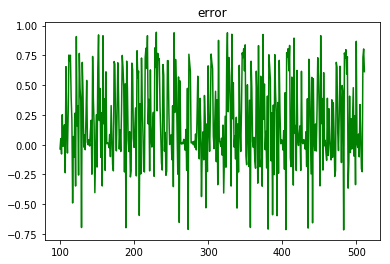

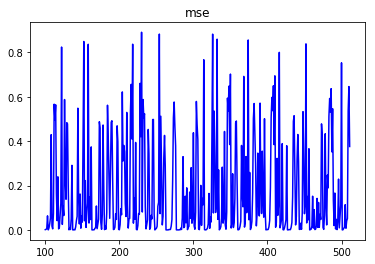

mae: 0.3358954898 
 mse: 0.1841327421 
 res: 61429.05733


In [5]:

for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1])
    
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

x_timeser_r2=x_timeser_r.copy()

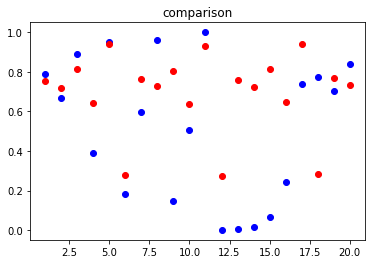

In [6]:
t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

0.6350206952 0.9270776475 0.2704187322
indmin 82 dist0 0.061088329
lyap 0.06931907829 1.049221356
dist 0.06409517941
b -1.344524147 c 0.4513033784
delta 0.05031569613
new value 0.6974199218
new coor 100 0.9270776475 0.2704187322
0.9270776475 0.2704187322 0.6974199218
indmin 91 dist0 0.05205535768
lyap 0.06931907829 1.049221356
dist 0.05461759299
b -1.526832061 c 0.5824829809
delta 0.03583599745
new value 0.7813340292
new coor 101 0.2704187322 0.6974199218
0.2704187322 0.6974199218 0.7813340292
indmin 92 dist0 0.05461759293
lyap 0.06931907829 1.049221356
dist 0.05730594494
b -1.444895959 c 0.5210639356
delta 0.05889474305
new value 0.7518953511
new coor 102 0.6974199218 0.7813340292
0.6974199218 0.7813340292 0.7518953511
indmin 93 dist0 0.05730594491
lyap 0.06931907829 1.049221356
dist 0.06012662124
b -1.604135171 c 0.6408854035
delta 0.09852935023
new value 0.8513322606
new coor 103 0.7813340292 0.7518953511
0.7813340292 0.7518953511 0.8513322606
indmin 39 dist0 0.05166768335
lyap 0.06

lyap 0.06931907829 1.049221356
dist 0.01886766444
b -1.996385807 c 0.996194671
delta 0.02788560922
new value 1.012135708
new coor 136 0.8700857683 0.4876249464
0.8700857683 0.4876249464 1.012135708
indmin 15 dist0 0.01886766438
lyap 0.06931907829 1.049221356
dist 0.01979635641
b -0.01443064653 c -6.65799736e-5
delta 0.02178447736
new value 0.01810756195
new coor 137 0.4876249464 1.012135708
0.4876249464 1.012135708 0.01810756195
indmin 16 dist0 0.01979635641
lyap 0.06931907829 1.049221356
dist 0.02077075992
b -0.05730609902 c 0.0007026154422
delta 0.0217606805
new value 0.03953338976
new coor 138 1.012135708 0.01810756195
1.012135708 0.01810756195 0.03953338976
indmin 17 dist0 0.02077075992
lyap 0.06931907829 1.049221356
dist 0.0217931249
b -0.2226564181 c 0.01215605251
delta 0.03084915723
new value 0.1267527877
new coor 139 0.01810756195 0.03953338976
0.01810756195 0.03953338976 0.1267527877
indmin 18 dist0 0.0217931249
lyap 0.06931907829 1.049221356
dist 0.02286581206
b -0.7914739114

lyap 0.06931907829 1.049221356
dist 0.01278463799
b -1.701708452 c 0.7239216625
delta 0.01118051651
new value 0.856444484
new coor 172 0.101485174 0.2939466473
0.101485174 0.2939466473 0.856444484
indmin 152 dist0 0.01278463791
lyap 0.06931907829 1.049221356
dist 0.01341391513
b -1.437311752 c 0.5163276726
delta 0.02354531895
new value 0.7304285355
new coor 173 0.2939466473 0.856444484
0.2939466473 0.856444484 0.7304285355
indmin 153 dist0 0.01341391532
lyap 0.06931907829 1.049221356
dist 0.01407416643
b -1.805467653 c 0.8149001262
delta 0.01062744808
new value 0.9080475507
new coor 174 0.856444484 0.7304285355
0.856444484 0.7304285355 0.9080475507
indmin 154 dist0 0.01407416646
lyap 0.06931907829 1.049221356
dist 0.01476691603
b -1.110103566 c 0.3080312509
delta 0.01431511593
new value 0.5622093408
new coor 175 0.7304285355 0.9080475507
0.7304285355 0.9080475507 0.5622093408
indmin 155 dist0 0.01476691607
lyap 0.06931907829 1.049221356
dist 0.01549376371
b -2.048064744 c 1.048481708
d

lyap 0.06931907829 1.049221356
dist 0.01121528218
b -1.98129889 c 0.9813191916
delta 0.01638678861
new value 0.9988428395
new coor 208 0.8775984548 0.4255971208
0.8775984548 0.4255971208 0.9988428395
indmin 179 dist0 0.01121528238
lyap 0.06931907829 1.049221356
dist 0.01176731379
b -0.1335792403 c 0.004421238169
delta 0.01258812044
new value 0.0730836804
new coor 209 0.4255971208 0.9988428395
0.4255971208 0.9988428395 0.0730836804
indmin 180 dist0 0.01176731379
lyap 0.06931907829 1.049221356
dist 0.01234651694
b -0.5503195311 c 0.07566720699
delta 0.01351881295
new value 0.281919172
new coor 210 0.9988428395 0.0730836804
0.9988428395 0.0730836804 0.281919172
indmin 181 dist0 0.01234651693
lyap 0.06931907829 1.049221356
dist 0.01295422924
b -1.579771158 c 0.6238367205
delta 0.01816670424
new value 0.798968931
new coor 211 0.0730836804 0.281919172
0.0730836804 0.281919172 0.798968931
indmin 182 dist0 0.01295422926
lyap 0.06931907829 1.049221356
dist 0.01359185399
b -1.386036174 c 0.48021

lyap 0.06931907829 1.049221356
dist 0.005960388839
b -0.2074191982 c 0.01074609451
delta 0.006192392509
new value 0.1068057954
new coor 244 0.5958463607 1.015489327
0.5958463607 1.015489327 0.1068057954
indmin 195 dist0 0.005960388843
lyap 0.06931907829 1.049221356
dist 0.006253767266
b -0.5933799108 c 0.08800334456
delta 0.009291947942
new value 0.3013359294
new coor 245 1.015489327 0.1068057954
1.015489327 0.1068057954 0.3013359294
indmin 196 dist0 0.006253767208
lyap 0.06931907829 1.049221356
dist 0.006561586112
b -1.725615952 c 0.7444257204
delta 0.006894317892
new value 0.8662551349
new coor 246 0.1068057954 0.3013359294
0.1068057954 0.3013359294 0.8662551349
indmin 197 dist0 0.006561585951
lyap 0.06931907829 1.049221356
dist 0.006884556111
b -1.467272893 c 0.5382085064
delta 0.00746435179
new value 0.7373686223
new coor 247 0.3013359294 0.8662551349
0.3013359294 0.8662551349 0.7373686223
indmin 198 dist0 0.006884556329
lyap 0.06931907829 1.049221356
dist 0.007223423529
b -1.82341

lyap 0.06931907829 1.049221356
dist 0.005969516523
b -1.145589794 c 0.3280872957
delta 0.005176305238
new value 0.5753830498
new coor 280 0.710597997 0.8940654033
0.710597997 0.8940654033 0.5753830498
indmin 259 dist0 0.00596951644
lyap 0.06931907829 1.049221356
dist 0.006263344136
b -2.055009098 c 1.055753695
delta 0.006900166304
new value 1.030954632
new coor 281 0.8940654033 0.5753830498
0.8940654033 0.5753830498 1.030954632
indmin 260 dist0 0.006263344052
lyap 0.06931907829 1.049221356
dist 0.006571634341
b -0.1872243037 c 0.008738650206
delta 0.009916606301
new value 0.09857045501
new coor 282 0.5753830498 1.030954632
0.5753830498 1.030954632 0.09857045501
indmin 261 dist0 0.006571634337
lyap 0.06931907829 1.049221356
dist 0.006895099093
b -0.600807168 c 0.09023125874
delta 0.006649675791
new value 0.3037284219
new coor 283 1.030954632 0.09857045501
1.030954632 0.09857045501 0.3037284219
indmin 262 dist0 0.006895099052
lyap 0.06931907829 1.049221356
dist 0.007234485179
b -1.712247

lyap 0.06931907829 1.049221356
dist 0.004640910888
b -1.615213333 c 0.652207003
delta 0.009278946663
new value 0.8122461398
new coor 315 0.08161100083 0.2932599459
0.08161100083 0.2932599459 0.8122461398
indmin 294 dist0 0.003594840051
lyap 0.06931907829 1.049221356
dist 0.003771782954
b -1.425476639 c 0.5079909352
delta 0.004461656615
new value 0.7149691476
new coor 316 0.2932599459 0.8122461398
0.2932599459 0.8122461398 0.7149691476
indmin 295 dist0 0.00377178253
lyap 0.06931907829 1.049221356
dist 0.003957434782
b -1.791132724 c 0.8020360916
delta 0.003473830141
new value 0.8973032769
new coor 317 0.8122461398 0.7149691476
0.8122461398 0.7149691476 0.8973032769
indmin 296 dist0 0.003957434632
lyap 0.06931907829 1.049221356
dist 0.004152224932
b -1.155027801 c 0.3335130578
delta 0.006081941144
new value 0.5805548711
new coor 318 0.7149691476 0.8973032769
0.7149691476 0.8973032769 0.5805548711
indmin 297 dist0 0.004152224817
lyap 0.06931907829 1.049221356
dist 0.004356602955
b -2.0666

lyap 0.06931907829 1.049221356
dist 0.007511181651
b -0.1700349925 c 0.00720558708
delta 0.00946310487
new value 0.08974904868
new coor 351 0.4386298001 1.011557735
0.4386298001 1.011557735 0.08974904868
indmin 330 dist0 0.007511181651
lyap 0.06931907829 1.049221356
dist 0.007880892199
b -0.5899582595 c 0.08698947199
delta 0.009636389282
new value 0.2997973244
new coor 352 1.011557735 0.08974904868
1.011557735 0.08974904868 0.2997973244
indmin 331 dist0 0.007880892192
lyap 0.06931907829 1.049221356
dist 0.008268800395
b -1.627192643 c 0.6619162042
delta 0.009543683388
new value 0.8183681634
new coor 353 0.08974904868 0.2997973244
0.08974904868 0.2997973244 0.8183681634
indmin 332 dist0 0.008268800471
lyap 0.06931907829 1.049221356
dist 0.008675802045
b -1.437220236 c 0.5163712173
delta 0.01082295163
new value 0.7240215936
new coor 354 0.2997973244 0.8183681634
0.2997973244 0.8183681634 0.7240215936
indmin 333 dist0 0.00867580217
lyap 0.06931907829 1.049221356
dist 0.00910283692
b -1.79

lyap 0.06931907829 1.049221356
dist 0.007307931966
b -0.1902318209 c 0.009033462045
delta 0.007368683637
new value 0.09880025226
new coor 387 0.4412487364 1.020474863
0.4412487364 1.020474863 0.09880025226
indmin 373 dist0 0.007307931967
lyap 0.06931907829 1.049221356
dist 0.007667638291
b -0.6036830109 c 0.09109885555
delta 0.006144543381
new value 0.3049137771
new coor 388 1.020474863 0.09880025226
1.020474863 0.09880025226 0.3049137771
indmin 374 dist0 0.007667638274
lyap 0.06931907829 1.049221356
dist 0.00804504983
b -1.64389546 c 0.675556361
delta 0.01291659423
new value 0.828406027
new coor 389 0.09880025226 0.3049137771
0.09880025226 0.3049137771 0.828406027
indmin 375 dist0 0.008045050008
lyap 0.06931907829 1.049221356
dist 0.008441038281
b -1.459605602 c 0.5325920256
delta 0.008967200351
new value 0.7342864011
new coor 390 0.3049137771 0.828406027
0.3049137771 0.828406027 0.7342864011
indmin 376 dist0 0.008441038179
lyap 0.06931907829 1.049221356
dist 0.008856517527
b -1.81616

lyap 0.06931907829 1.049221356
dist 0.007796682017
b -0.2150563906 c 0.01154827274
delta 0.007494009005
new value 0.1112751998
new coor 423 0.4488526857 1.02043763
0.4488526857 1.02043763 0.1112751998
indmin 409 dist0 0.00779668202
lyap 0.06931907829 1.049221356
dist 0.008180445284
b -0.6215835769 c 0.09656741886
delta 0.00982179099
new value 0.3157026839
new coor 424 1.02043763 0.1112751998
1.02043763 0.1112751998 0.3157026839
indmin 158 dist0 0.005404516544
lyap 0.06931907829 1.049221356
dist 0.005670534178
b -1.717255088 c 0.7372253912
delta 0.007967015103
new value 0.8626110516
new coor 425 0.1112751998 0.3157026839
0.1112751998 0.3157026839 0.8626110516
indmin 159 dist0 0.005670534292
lyap 0.06931907829 1.049221356
dist 0.005949645681
b -0.8215173365 c 0.1687062655
delta 0.008103836603
new value 0.4148105866
new coor 426 0.3157026839 0.8626110516
0.3157026839 0.8626110516 0.4148105866
indmin 160 dist0 0.005949645687
lyap 0.06931907829 1.049221356
dist 0.006242495317
b -1.959996407

lyap 0.06931907829 1.049221356
dist 0.003333129408
b -1.84531383 c 0.8512884469
delta 0.005417039358
new value 0.9253654348
new coor 459 0.8725513011 0.7381571585
0.8725513011 0.7381571585 0.9253654348
indmin 401 dist0 0.002404961092
lyap 0.06931907829 1.049221356
dist 0.002523336539
b -1.158517723 c 0.3355347668
delta 0.004924262956
new value 0.5817209932
new coor 460 0.7381571585 0.9253654348
0.7381571585 0.9253654348 0.5817209932
indmin 402 dist0 0.002523336562
lyap 0.06931907829 1.049221356
dist 0.00264753861
b -2.111974068 c 1.115107866
delta 0.001731250668
new value 1.056852659
new coor 461 0.9253654348 0.5817209932
0.9253654348 0.5817209932 1.056852659
indmin 403 dist0 0.002647538297
lyap 0.06931907829 1.049221356
dist 0.002777853723
b -0.2721327993 c 0.01851316003
delta 0.001902706219
new value 0.1370177527
new coor 462 0.5817209932 1.056852659
0.5817209932 1.056852659 0.1370177527
indmin 404 dist0 0.002777853737
lyap 0.06931907829 1.049221356
dist 0.002914583466
b -0.686779212

lyap 0.06931907829 1.049221356
dist 0.002356577294
b -1.827303032 c 0.8347551544
delta 0.003969133387
new value 0.9156360828
new coor 495 0.8636206222 0.731324017
0.8636206222 0.731324017 0.9156360828
indmin 303 dist0 0.002356576896
lyap 0.06931907829 1.049221356
dist 0.002472570807
b -1.140600143 c 0.3252410984
delta 0.002071724823
new value 0.5713359338
new coor 496 0.731324017 0.9156360828
0.731324017 0.9156360828 0.5713359338
indmin 304 dist0 0.002472570561
lyap 0.06931907829 1.049221356
dist 0.002594273838
b -2.088962207 c 1.090939056
delta 0.002622015453
new value 1.045792111
new coor 497 0.9156360828 0.5713359338
0.9156360828 0.5713359338 1.045792111
indmin 248 dist0 0.002273761695
lyap 0.06931907829 1.049221356
dist 0.00238567933
b -0.2504402425 c 0.01567809845
delta 0.002814470322
new value 0.1266273564
new coor 498 0.5713359338 1.045792111
0.5713359338 1.045792111 0.1266273564
indmin 249 dist0 0.002385679339
lyap 0.06931907829 1.049221356
dist 0.002503105712
b -0.6702739864 c

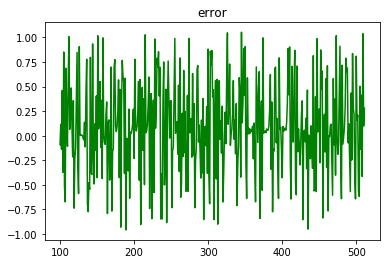

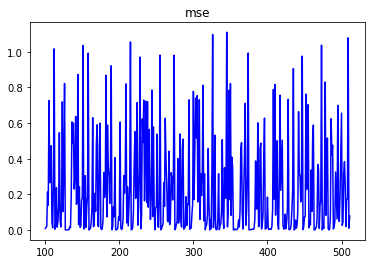

mae: 0.3878222847 
 mse: 0.2334424212 
 res: 64498.7866


In [7]:
D=3

x_timeser=x_timeser_o.copy()
x_timeser_r=x_timeser_o.copy()

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    for j in range (D):
        coor_emb[i,j]=x_timeser[i+j,0] #pegando as coordenadas no espaço de dimensão D

for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1],coor_emb[l-D,2])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

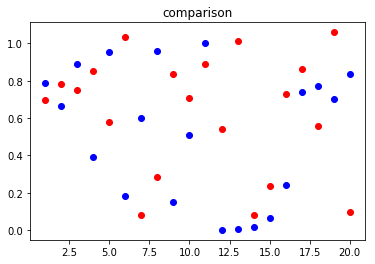

In [8]:
#print(sum(mae_f),mae_f.shape[0])
#print(mae_f,abs(mae_f))

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()



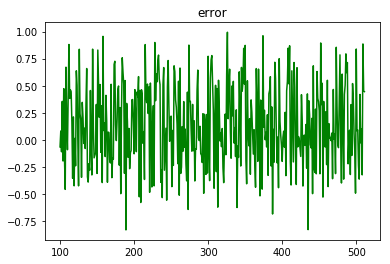

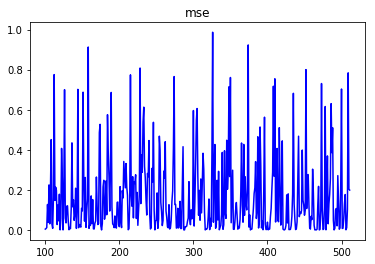

mae: 0.3382768714 
 mse: 0.1674416298 
 res: 62945.12003


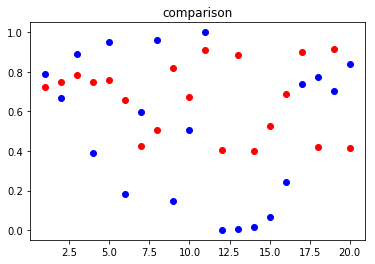

In [9]:
x_multdim=(x_timeser_r+x_timeser_r2)/2

#for i in range (x_multdim.shape[0]): print(i,x_multdim[i],x_timeser_r[i],x_timeser_r2[i])
    
error=x_multdim-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]

mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]


t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()

print('mae:',mae,'\n mse:',mse,'\n res:',res)

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_multdim[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

